In [82]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
color_pal=sns.color_palette()
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [83]:
df=pd.read_csv('product k_basemodel.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [84]:
sales_k= df.drop(['Product Name','Product Category','Month','Year', 'SMA_12months','SMA_6months','SMA_3months'],axis=1)

In [85]:
sales_k.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [86]:
sales_k.head()

,Sales
Month-Year,
2019-01-01,505010
2019-02-01,521132
2019-03-01,580897
2019-04-01,612559
2019-05-01,550697


<Axes: title={'center': 'Product K'}, xlabel='Month-Year'>

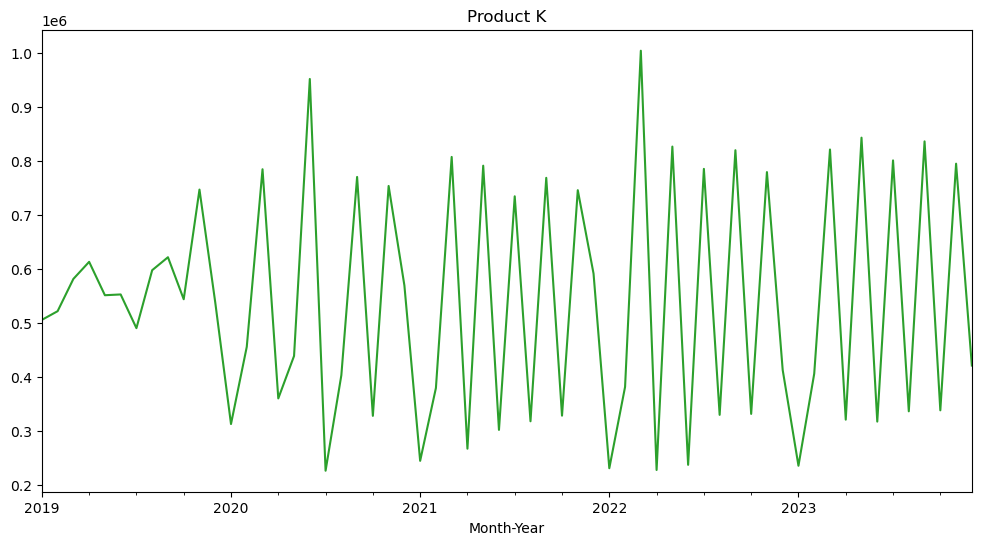

In [87]:
sales_k['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product K')

In [88]:
train_12= sales_k[:48]
test_12= sales_k[48:]

In [89]:
y_hat_sma = sales_k.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = sales_k['Sales'].rolling(ma_window).mean().shift()
y_hat_sma['sma_forecast'][len(train_12):] = y_hat_sma['sma_forecast'][len(train_12)]

C:\Users\Maaz\AppData\Local\Temp\ipykernel_9716\2543217068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma['sma_forecast'][len(train_12):] = y_hat_sma['sma_forecast'][len(train_12)]


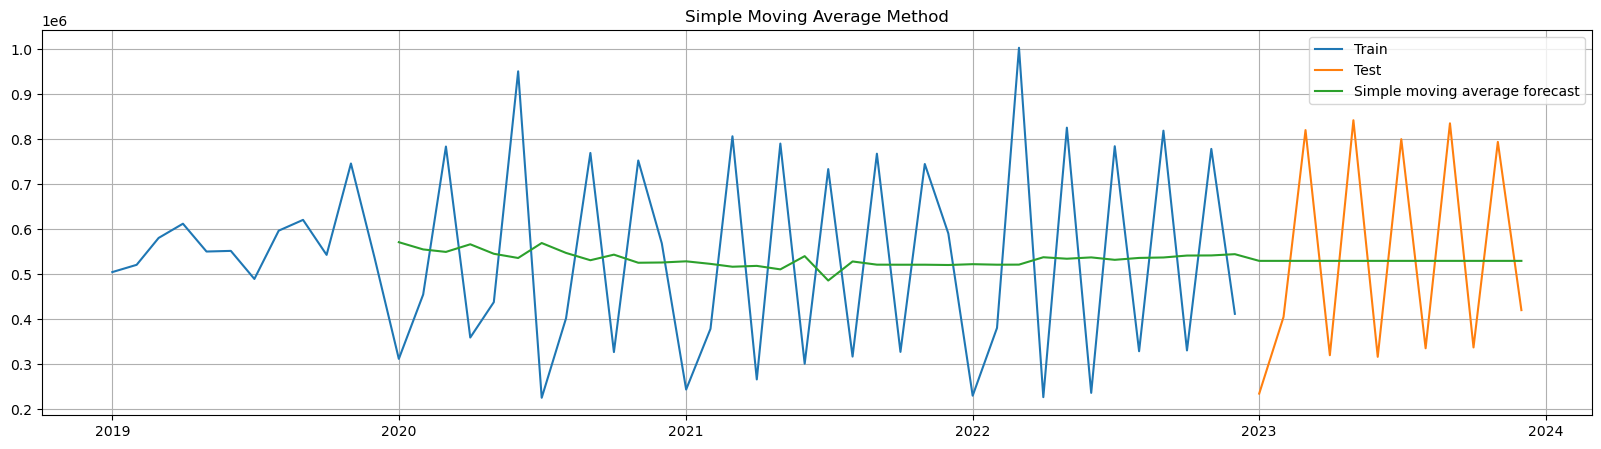

In [90]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_12['Sales'], label='Train')
plt.plot(test_12['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [91]:
y_hat_sma

,Sales,sma_forecast
Month-Year,,
2019-01-01,505010,NaN
2019-02-01,521132,NaN
2019-03-01,580897,NaN
2019-04-01,612559,NaN
2019-05-01,550697,NaN
2019-06-01,552137,NaN
2019-07-01,489712,NaN
2019-08-01,597098,NaN
2019-09-01,621078,NaN


In [92]:
pred_12= y_hat_sma['sma_forecast'].iloc[48:]

In [93]:
pred_12

Month-Year
2023-01-01    529940.166667
2023-02-01    529940.166667
2023-03-01    529940.166667
2023-04-01    529940.166667
2023-05-01    529940.166667
2023-06-01    529940.166667
2023-07-01    529940.166667
2023-08-01    529940.166667
2023-09-01    529940.166667
2023-10-01    529940.166667
2023-11-01    529940.166667
2023-12-01    529940.166667
Name: sma_forecast, dtype: float64

In [94]:
mae_12= mean_absolute_error(test_12,pred_12)
mse_12=mean_squared_error(test_12,pred_12)
mape_12= mean_absolute_percentage_error(test_12,pred_12)
rmse_12= np.sqrt(mean_squared_error(test_12,pred_12))

print(f'MAE - Simple Moving Averages_12 months: {mae_12:0.3f}')
print(f'MAPE - Simple Moving Averages_12 months: {mape_12:0.3f}')
print(f'MSE - Simple Moving Averages_12 months: {mse_12:0.3f}')
print(f'RMSE - Simple Moving Averages_12 months: {rmse_12:0.3f}')

MAE - Simple Moving Averages_12 months: 231953.861
MAPE - Simple Moving Averages_12 months: 0.505
MSE - Simple Moving Averages_12 months: 58159331550.472
RMSE - Simple Moving Averages_12 months: 241162.459


In [95]:
train_6= sales_k[:54]
test_6= sales_k[54:]

In [96]:
y_hat_sma_6 = sales_k.copy()
ma_window_6 = 6
y_hat_sma_6['sma_forecast'] = sales_k['Sales'].rolling(ma_window_6).mean().shift()
y_hat_sma_6['sma_forecast'][len(train_6):] = y_hat_sma_6['sma_forecast'][len(train_6)]

C:\Users\Maaz\AppData\Local\Temp\ipykernel_9716\1733848085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma_6['sma_forecast'][len(train_6):] = y_hat_sma_6['sma_forecast'][len(train_6)]


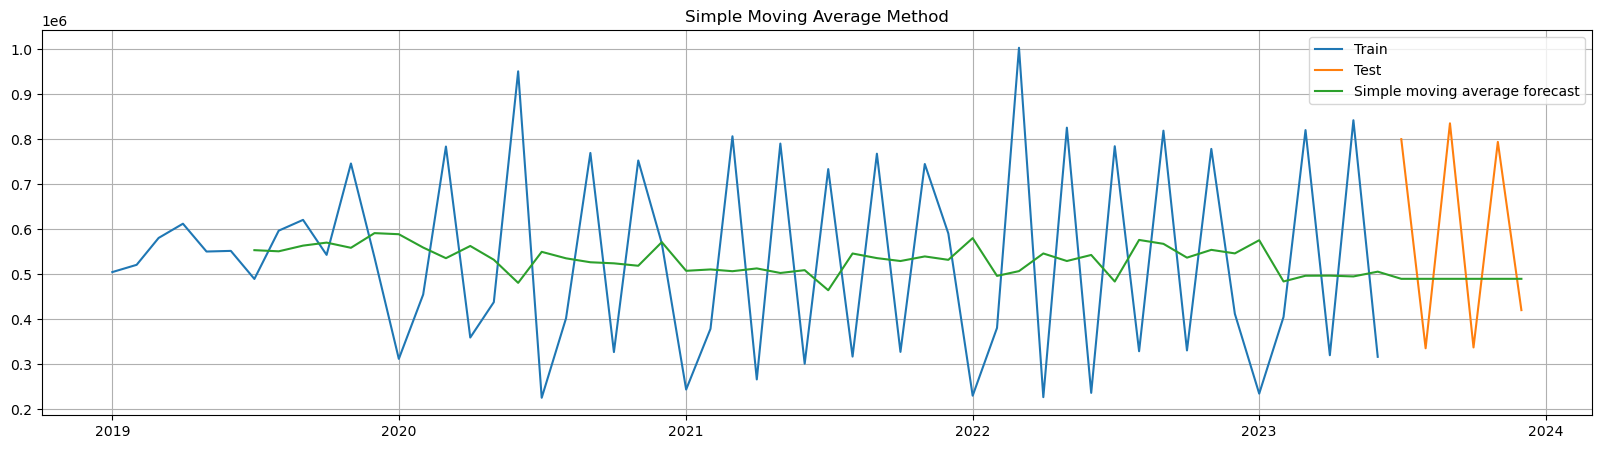

In [97]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_6['Sales'], label='Train')
plt.plot(test_6['Sales'], label='Test')
plt.plot(y_hat_sma_6['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [98]:
y_hat_sma_6

,Sales,sma_forecast
Month-Year,,
2019-01-01,505010,NaN
2019-02-01,521132,NaN
2019-03-01,580897,NaN
2019-04-01,612559,NaN
2019-05-01,550697,NaN
2019-06-01,552137,NaN
2019-07-01,489712,553738.666667
2019-08-01,597098,551189.000000
2019-09-01,621078,563850.000000


In [99]:
pred_6= y_hat_sma_6['sma_forecast'].iloc[54:]

In [100]:
pred_6

Month-Year
2023-07-01    490025.833333
2023-08-01    490025.833333
2023-09-01    490025.833333
2023-10-01    490025.833333
2023-11-01    490025.833333
2023-12-01    490025.833333
Name: sma_forecast, dtype: float64

In [101]:
mae_6= mean_absolute_error(test_6,pred_6)
mse_6=mean_squared_error(test_6,pred_6)
mape_6= mean_absolute_percentage_error(test_6,pred_6)
rmse_6= np.sqrt(mean_squared_error(test_6,pred_6))

print(f'MAE - Simple Moving Averages_6 months: {mae_6:0.3f}')
print(f'MAPE - Simple Moving Averages_6 months: {mape_6:0.3f}')
print(f'MSE - Simple Moving Averages_6 months: {mse_6:0.3f}')
print(f'RMSE - Simple Moving Averages_6 months: {rmse_6:0.3f}')

MAE - Simple Moving Averages_6 months: 222857.500
MAPE - Simple Moving Averages_6 months: 0.377
MSE - Simple Moving Averages_6 months: 60086744456.694
RMSE - Simple Moving Averages_6 months: 245125.977


In [102]:
train_3= sales_k[:57]
test_3= sales_k[57:]

In [103]:
y_hat_sma_3 = sales_k.copy()
ma_window_3 = 3
y_hat_sma_3['sma_forecast'] = sales_k['Sales'].rolling(ma_window_3).mean().shift()
y_hat_sma_3['sma_forecast'][len(train_3):] = y_hat_sma_3['sma_forecast'][len(train_3)]

C:\Users\Maaz\AppData\Local\Temp\ipykernel_9716\876752825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma_3['sma_forecast'][len(train_3):] = y_hat_sma_3['sma_forecast'][len(train_3)]


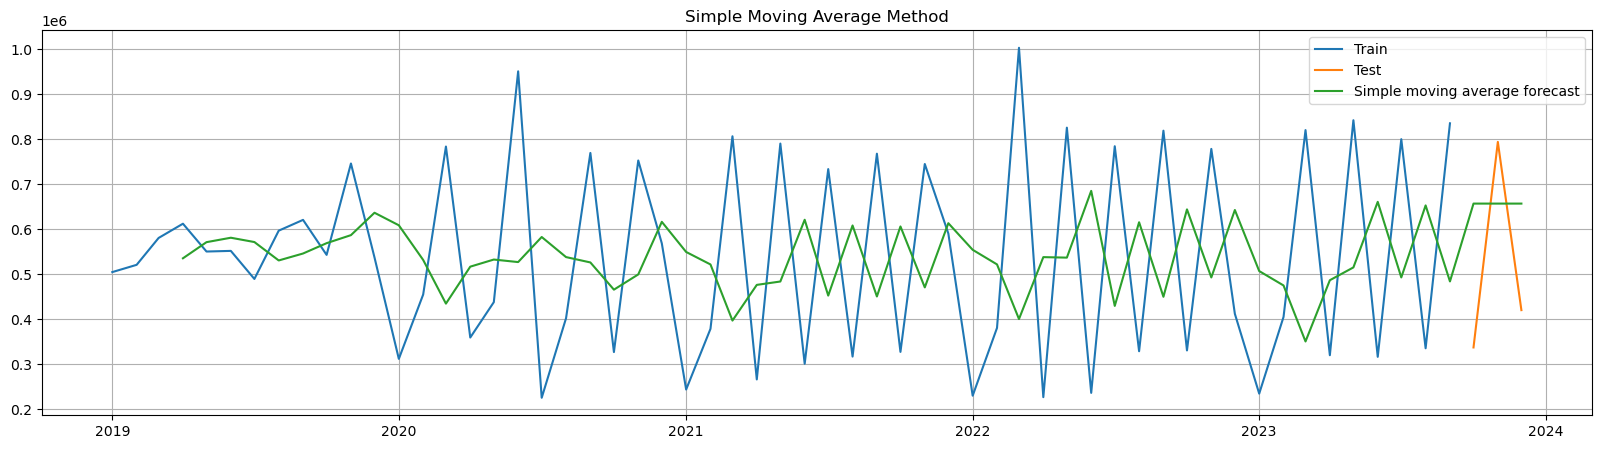

In [104]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_3['Sales'], label='Train')
plt.plot(test_3['Sales'], label='Test')
plt.plot(y_hat_sma_3['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [105]:
y_hat_sma_3

,Sales,sma_forecast
Month-Year,,
2019-01-01,505010,NaN
2019-02-01,521132,NaN
2019-03-01,580897,NaN
2019-04-01,612559,535679.666667
2019-05-01,550697,571529.333333
2019-06-01,552137,581384.333333
2019-07-01,489712,571797.666667
2019-08-01,597098,530848.666667
2019-09-01,621078,546315.666667


In [106]:
pred_3= y_hat_sma_3['sma_forecast'].iloc[57:]

In [107]:
pred_3

Month-Year
2023-10-01    657282.666667
2023-11-01    657282.666667
2023-12-01    657282.666667
Name: sma_forecast, dtype: float64

In [108]:
mae_3= mean_absolute_error(test_3,pred_3)
mse_3=mean_squared_error(test_3,pred_3)
mape_3= mean_absolute_percentage_error(test_3,pred_3)
rmse_3= np.sqrt(mean_squared_error(test_3,pred_3))

print(f'MAE - Simple Moving Averages_3 months: {mae_3:0.3f}')
print(f'MAPE - Simple Moving Averages_3 months: {mape_3:0.3f}')
print(f'MSE - Simple Moving Averages_3 months: {mse_3:0.3f}')
print(f'RMSE - Simple Moving Averages_3 months: {rmse_3:0.3f}')

MAE - Simple Moving Averages_3 months: 231271.889
MAPE - Simple Moving Averages_3 months: 0.561
MSE - Simple Moving Averages_3 months: 59065018977.667
RMSE - Simple Moving Averages_3 months: 243032.959
